# House Price Prediction : Scikit-Learn 

In [17]:
# Import library :
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Import your dataset from any resources :

data = pd.read_csv('Housedata.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [19]:
# Data Cleaning :

data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [21]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [22]:
df = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','price']]
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,price
0,3.0,1.50,1340,7912,1.5,0,0,3,313000.0
1,5.0,2.50,3650,9050,2.0,0,4,5,2384000.0
2,3.0,2.00,1930,11947,1.0,0,0,4,342000.0
3,3.0,2.25,2000,8030,1.0,0,0,4,420000.0
4,4.0,2.50,1940,10500,1.0,0,0,4,550000.0


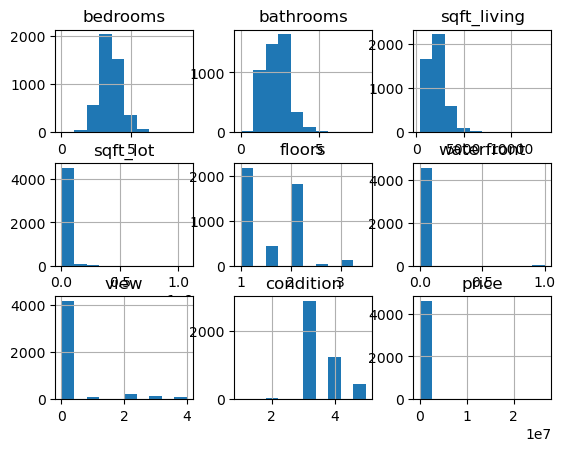

In [23]:
viz = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','price']]
viz.hist()
plt.show()

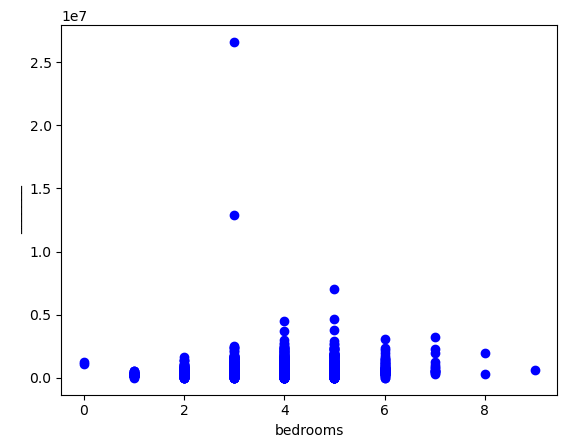

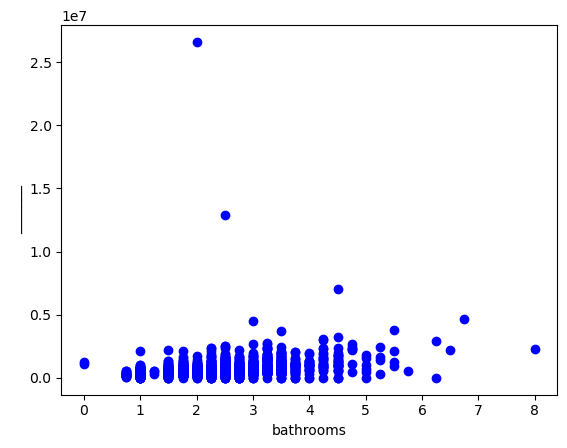

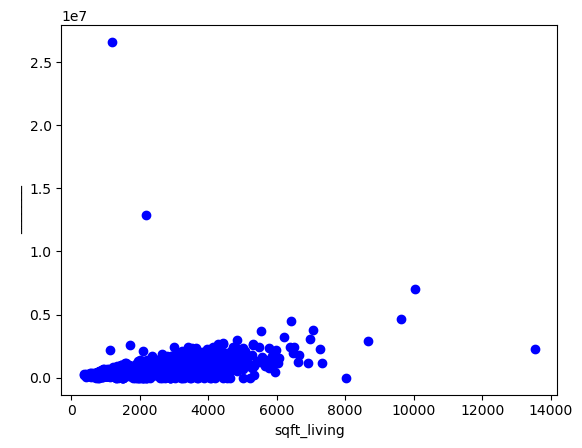

In [24]:
for i in df[['bedrooms', 'bathrooms', 'sqft_living']]:
    plt.scatter(df[i],df['price'],color='blue')
    plt.xlabel(i)
    plt.ylabel("_______")
    plt.show()

In [25]:
# Let's Select the revalant features and avoid irrevalante features :
features = df[['sqft_living', 'sqft_lot', 'floors']]

In [26]:
# Define the Target Values :
T_value = df['price']

In [27]:
# Split the data into Training and Testing data :
X_train, X_test, y_train, y_test = train_test_split( features, T_value, test_size=0.2, random_state=42)

In [28]:
# Standardization process :
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Using sklearn select the Linear_Regression model and Fit the train-data into model:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
# Predict the model performance :
prediction = model.predict(X_test_scaled)

In [31]:
# Find the mean_squared_error :
mse = mean_squared_error(y_test, prediction)
print(f'Mean_Squared_Error(Sk-learn) : {mse}')

Mean_Squared_Error(Sk-learn) : 989189020324.2651


In [32]:
r2 = r2_score(y_test, prediction)
r2

0.03006072440292884

# House Price Prediction : Tensor-Flow

In [33]:
# Import necessary libraries from TensorFlow :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
# Evaluate the model
model_tf = Sequential()

In [35]:
model_tf.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_tf.add(Dense(1))

In [36]:
model_tf.compile(optimizer='adam', loss='mse')
model_tf.fit(X_train_scaled, y_train, epochs = 50, batch_size = 32, validation_data = (X_test_scaled, y_test))

Epoch 1/50
115/115 [==============================] - 2s 7ms/step - loss: 438944628736.0000 - val_loss: 1356733349888.0000
Epoch 2/50
115/115 [==============================] - 0s 4ms/step - loss: 438940893184.0000 - val_loss: 1356728107008.0000
Epoch 3/50
115/115 [==============================] - 0s 4ms/step - loss: 438933585920.0000 - val_loss: 1356718276608.0000
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 438921691136.0000 - val_loss: 1356703989760.0000
Epoch 5/50
115/115 [==============================] - 0s 4ms/step - loss: 438904979456.0000 - val_loss: 1356684328960.0000
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 438883221504.0000 - val_loss: 1356659818496.0000
Epoch 7/50
115/115 [==============================] - 0s 4ms/step - loss: 438856220672.0000 - val_loss: 1356629671936.0000
Epoch 8/50
115/115 [==============================] - 0s 4ms/step - loss: 438824075264.0000 - val_loss: 1356595331072.0000
Epoch 9/50
115/1

In [37]:
prediction_tf = model_tf.predict(X_test_scaled)
accuracy = model_tf.evaluate(X_test_scaled, y_test)
accuracy

29/29 [==============================] - 0s 3ms/step - loss: 1352486354944.0000


1352486354944.0

In [38]:
mse_tf = mean_squared_error(y_test, prediction_tf)
print(f'Mean_Squared_Error(TensorFlow) : {mse_tf}')

Mean_Squared_Error(TensorFlow) : 1352486334179.8157


In [39]:
r2 = r2_score(y_test, prediction_tf)
r2

-0.32616677730539223